In [40]:
%matplotlib inline
import pandas as pd
from getdist import plots
from getdist import MCSamples

import matplotlib.pyplot as plt
import numpy as np
from cosmosis.postprocess import parser
from cosmosis.postprocessing.inputs import read_input
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.postprocessing.plots import (
    MetropolisHastingsPlots2D,
    MetropolisHastingsPlots1D,
)

import os
import corner
from chainconsumer import ChainConsumer

from IPython.display import display, Math
from numcosmo_py import Nc
from numcosmo_py import Ncm


# CCL
import pyccl as ccl
from pyccl.halos.massdef import MassDef
import firecrown
import sys 
import math 
import sacc

import sys
sys.path.insert(0,'../scripts')



In [41]:
shear_data = read_input(
    "/sps/lsst/groups/clusters/cl_pipeline_project/eduardo/firecrown/examples/cluster_number_counts/tests_crit/shear_CPL/output/number_counts_samples.txt"
)
shear_counts_data = read_input(
   "/pbs/home/e/ebarroso/LSST_France/mock_data_run/shear_counts/output/number_counts_samples.txt"
)


data_test = [shear_data, shear_counts_data]
for data in data_test:
    print(len(data[1]["data"][1][0]))

LOADING CHAIN FROM FILE:  /sps/lsst/groups/clusters/cl_pipeline_project/eduardo/firecrown/examples/cluster_number_counts/tests_crit/shear_CPL/output/number_counts_samples.txt
LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/LSST_France/mock_data_run/shear_counts/output/number_counts_samples.txt
1980
720


In [42]:
names = [
    '1',
    '2'  
]
labels = [r"\Omega_c", r"\sigma_8"]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 3,
    "smooth_scale_1D": 3,
    "boundary_correction_order": 0,
}
sample_list = []

data_so = []
data_red = data_test[0]
for line in data_red[1]["data"][1][0]:
    data_so.append([line[0], line[1]])


sample_red = MCSamples(samples=np.array( data_so[: int(len(data_so)*0.3)]), names=names, labels=labels, settings=settings)
data_so = []
data_red = data_test[1]
for line in data_red[1]["data"][1][0]:
    data_so.append([line[0], line[1]])


sample_red2 = MCSamples(samples=np.array(data_so), names=names, labels=labels, settings=settings)




Removed no burn in
Removed no burn in


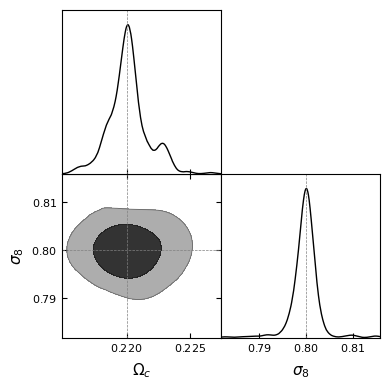


 The best fit for the three cases are: 


 Using data from mean mass only 


 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [38]:
# Triangle plot
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot(
    [sample_red],
    filled=True,
    alphas=[0.8,0.55],
    contour_ls="-",
    contour_lws=1,
    fine_bins=1,
    colors=['black', 'red'],
    line_args=[{'lw':1.2,'ls':'-'}],
    marker_args={"linewidth": 4},
    markers={"1": 0.22, "2": 0.800},
#     param_limits={'1': [0.15, 0.3],
#                 '2' : [.7, 0.9]},
)
#plt.savefig('/pbs/home/e/ebarroso/LSST_France/mock_data_run/shear/cosmo_plot_shear.pdf')

plt.show()
#g.export('apes.png')
print("\n The best fit for the three cases are: \n")
print("\n Using data from mean mass only \n")
g.export('mock_test.png')

print("\n Using data from both \n")
display(Math(sample_red.getInlineLatex('1',limit=1)))
display(Math(sample_red.getInlineLatex('2',limit=1)))



In [43]:
# names = [
#     '1',
#     '2',
#     '3',
#     '4',
#     '5',
#     '6',
#     '7',
#     '8'    
# ]
# labels = [r"\Omega_c", r"\sigma_8", r"\mu_0", r"\mu_m", r"\mu_z",r"\sigma_0", r"\sigma_m", r"\sigma_z"]
# settings = {
#     "mult_bias_correction_order": 0,
#     "smooth_scale_2D": 3,
#     "smooth_scale_1D": 3,
#     "boundary_correction_order": 0,
# }
# sample_list = []

# data_so = []
# data_red = data_test[-1]
# for line in data_red[1]["data"][1][0]:
#     data_so.append([line[0], line[1], line[2], line[3], line[4], line[5], line[6], line[7]])


# sample_red = MCSamples(samples=np.array(data_so), names=names, labels=labels, settings=settings)
names = [
    '1',
    '2',
    '3',
    '4'
]
labels = [r"\Omega_c", r"\sigma_8", r"\mu_0",r"\sigma_0"]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 3,
    "smooth_scale_1D": 3,
    "boundary_correction_order": 0,
}
sample_list = []

data_so = []
data_red = data_test[-1]
for line in data_red[1]["data"][1][0]:
    data_so.append([line[0], line[1], line[2], line[5]])


sample_red = MCSamples(samples=np.array(data_so), names=names, labels=labels, settings=settings)




Removed no burn in


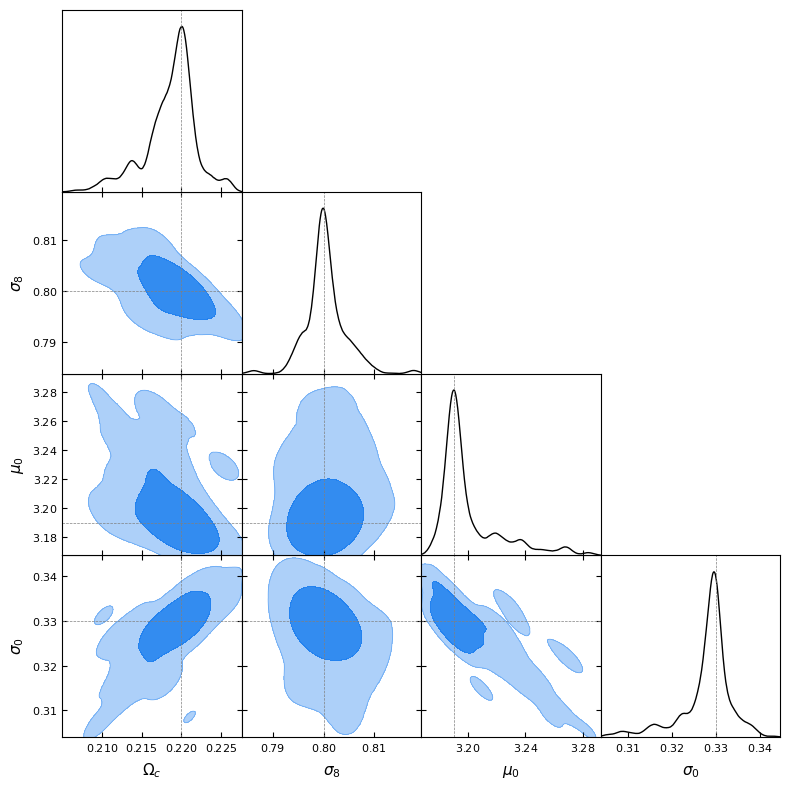


 The best fit for the three cases are: 


 Using data from mean mass only 


 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [44]:
# # Triangle plot
# %matplotlib inline
# g = plots.get_subplot_plotter()
# g.triangle_plot(
#     [sample_red],
#     filled=True,
#     alphas=[0.8,0.55],
#     contour_ls="-",
#     contour_lws=1,
#     fine_bins=1,
#     line_args=[{'lw':1.2,'ls':'-'}],
#     marker_args={"linewidth": 4},
#         markers={"1": 0.22, "2": 0.800, "3": 3.19, "4": 0.8685889638, "5": -0.304, "6": 0.33, "7": -0.034 , "8": 0.0},
# #     param_limits={'1': [0.15, 0.3],
# #                 '2' : [.7, 0.9]},
# )
# plt.savefig('/pbs/home/e/ebarroso/LSST_France/mock_data_run/shear_counts/shear_counts.pdf')

# plt.show()
# #g.export('apes.png')
# print("\n The best fit for the three cases are: \n")
# print("\n Using data from mean mass only \n")
# g.export('mock_test.png')

# print("\n Using data from both \n")
# display(Math(sample_red.getInlineLatex('1',limit=1)))
# display(Math(sample_red.getInlineLatex('2',limit=1)))
# Triangle plot
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot(
    [sample_red],
    filled=True,
    alphas=[0.8,0.55],
    contour_ls="-",
    contour_lws=1,
    fine_bins=1,
    line_args=[{'lw':1.2,'ls':'-'}],
    marker_args={"linewidth": 4},
        markers={"1": 0.22, "2": 0.800, "3": 3.19, "4": 0.33},
#     param_limits={'1': [0.15, 0.3],
#                 '2' : [.7, 0.9]},
)
#plt.savefig('/pbs/home/e/ebarroso/LSST_France/mock_data_run/shear_counts/shear_counts.png')

plt.show()
#g.export('apes.png')
print("\n The best fit for the three cases are: \n")
print("\n Using data from mean mass only \n")
g.export('mock_test.png')

print("\n Using data from both \n")
display(Math(sample_red.getInlineLatex('1',limit=1)))
display(Math(sample_red.getInlineLatex('2',limit=1)))



[5.60892770e-05 6.59134191e-05 7.62151983e-05 8.59140979e-05
 9.40905513e-05 1.00298997e-04 1.42598421e-04 1.67590702e-04
 1.96010168e-04 2.21949368e-04 2.45335204e-04 2.63373172e-04
 2.69394859e-04 3.15403713e-04 3.65357509e-04 4.15984401e-04
 4.60063847e-04 4.96323320e-04 1.45190314e-03 1.56088866e-03
 1.80997596e-03 2.03471275e-03 2.27791680e-03 2.45728648e-03
 3.08798942e-03 3.37910117e-03 3.65767283e-03 4.25913625e-03
 4.81608108e-03 5.10136574e-03 4.66028179e-05 5.46026461e-05
 6.30725420e-05 7.06398275e-05 7.70624485e-05 8.19927144e-05
 9.62545632e-05 1.12556985e-04 1.30866257e-04 1.47851639e-04
 1.62713612e-04 1.74231730e-04 2.22823949e-04 2.51335687e-04
 2.91880325e-04 3.32942593e-04 3.69001659e-04 3.96829534e-04
 6.93073485e-04 7.54034995e-04 8.49800756e-04 9.60734085e-04
 1.06146963e-03 1.14615538e-03 7.65349269e-04 7.86779913e-04
 8.91041281e-04 9.41651940e-04 1.05094502e-03 1.13642979e-03
 3.00039770e-05 3.51289235e-05 4.03466371e-05 4.51710607e-05
 4.91527599e-05 5.227076

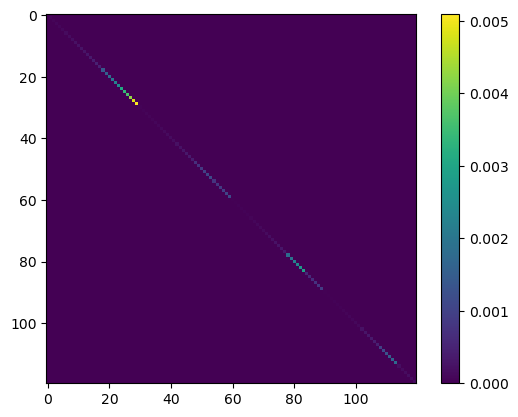

[5.25641005e-05 6.44380644e-05 7.58135352e-05 8.58456094e-05
 9.42183407e-05 1.00989438e-04 1.29975338e-04 1.61628113e-04
 1.93029049e-04 2.21439256e-04 2.45542536e-04 2.65209347e-04
 2.37986569e-04 2.96931866e-04 3.57193637e-04 4.12940754e-04
 4.60915082e-04 5.00359963e-04 1.13523287e-03 1.42045161e-03
 1.72349179e-03 2.01230064e-03 2.26586268e-03 2.47674315e-03
 2.30194554e-03 2.89836058e-03 3.54454288e-03 4.17013074e-03
 4.72548908e-03 5.19052075e-03 4.37716585e-05 5.34134372e-05
 6.25511570e-05 7.05494860e-05 7.71946407e-05 8.25565218e-05
 8.76858589e-05 1.08621186e-04 1.29114238e-04 1.47468189e-04
 1.62935730e-04 1.75509306e-04 1.90700637e-04 2.37867231e-04
 2.85912003e-04 3.30234303e-04 3.68306496e-04 3.99577203e-04
 5.44429058e-04 6.76620465e-04 8.15173828e-04 9.45793319e-04
 1.05959934e-03 1.15380418e-03 5.56044524e-04 6.74413078e-04
 8.02910068e-04 9.27569551e-04 1.03838163e-03 1.13119696e-03
 2.80286187e-05 3.41724501e-05 3.99766018e-05 4.50450956e-05
 4.92498992e-05 5.264020

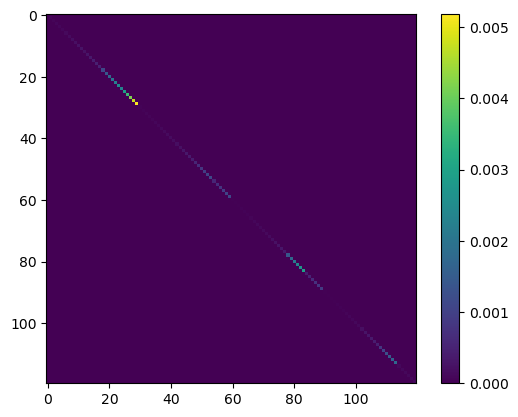

[7.88845890e-04 1.79023074e-04 7.84842188e-05 8.58793733e-05
 9.40176395e-05 1.00175462e-04 3.65300696e-03 3.63846863e-04
 1.98960299e-04 2.20674137e-04 2.44664413e-04 2.62767190e-04
 5.16642476e-03 7.14118717e-04 3.91395972e-04 4.20081986e-04
 4.60533442e-04 4.95180374e-04 3.72920505e-03 2.63216134e-03
 1.93236965e-03 2.02985908e-03 2.28673520e-03 2.45470321e-03
 0.00000000e+00 3.41141663e-03 3.66462840e-03 4.13064526e-03
 4.71963009e-03 5.12550010e-03 5.96629835e-04 3.27073989e-04
 6.64530691e-05 7.02914620e-05 7.68366444e-05 8.18031641e-05
 2.72881792e-03 1.08151529e-03 1.47611982e-04 1.47704606e-04
 1.62750453e-04 1.73554734e-04 6.59573960e-03 1.60711887e-03
 3.14528874e-04 3.28167260e-04 3.65627218e-04 3.95645818e-04
 1.83958548e-03 3.03677673e-03 1.28753130e-03 9.86795228e-04
 1.06683617e-03 1.14503218e-03 0.00000000e+00 4.58205839e-04
 5.30135244e-04 8.78094714e-04 1.05992202e-03 1.13829919e-03
 5.50184644e-04 2.88268381e-04 4.87140682e-05 4.47093177e-05
 4.88937096e-05 5.220075

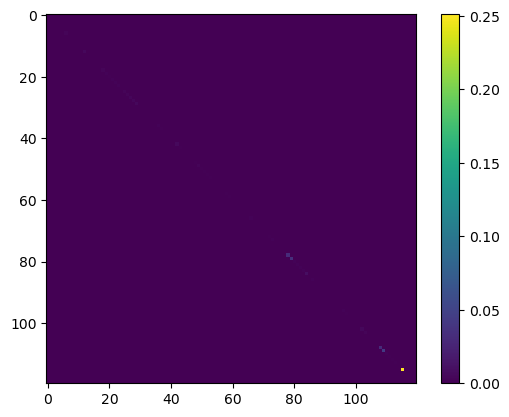

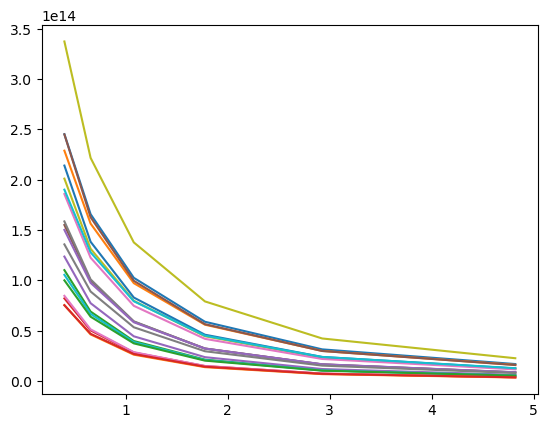

/tmp/ipykernel_4784/436454337.py:29: RuntimeWarning: overflow encountered in power
  plt.plot(radius_centers, 10**np.array(profile_bin))


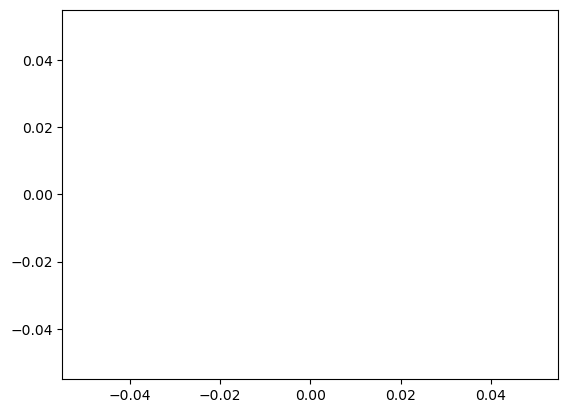

In [29]:
from firecrown.models.cluster import deltasigma_data
from firecrown.models.cluster import properties
covs = []
for sacc_file in sacc_list:
    cl_data = deltasigma_data.DeltaSigmaData(sacc_file)
    data, inds = cl_data.get_observed_data_and_indices_by_survey("numcosmo_simulated_redshift_richness_deltasigma", properties=properties.ClusterProperty.DELTASIGMA)
    cov_block = sacc_file.covariance.get_block(inds)
    plt.imshow(cov_block)
    #cov_neg = cov_block[cov_block < 0]
    #print(np.min(cov_block[np.nonzero(cov_block)]))
    print(np.diag(cov_block))
    covs.append(np.diag(cov_block))
    plt.colorbar()
    print(name)
    plt.show()

for sacc_file, name in zip(sacc_list, plot_names):
    cl_data = deltasigma_data.DeltaSigmaData(sacc_file)
    tracers_comb = cl_data._all_bin_combinations_for_data_type_and_survey(survey_nm="numcosmo_simulated_redshift_richness_deltasigma", data_type=sacc.data_types.standard_types.cluster_shear, tracers_n=4)
    shear_data = sacc_file.get_data_points(data_type=sacc.data_types.standard_types.cluster_shear)
    tracers_zr_comb = set([(comb[1],comb[2]) for comb in tracers_comb])
    radius_centers = [sacc_file.get_tracer(name=f'bin_radius_{j}').center for j in range(0,6)]
    for comb in tracers_zr_comb:
        profile_bin = []
        for i in range(0,6):
            bin_data = sacc_file.get_data_points(data_type=sacc.data_types.standard_types.cluster_shear, tracers=("numcosmo_simulated_redshift_richness_deltasigma", comb[0], comb[1], f'bin_radius_{i}'))

            profile_bin.append(bin_data[0].value)
        plt.plot(radius_centers, 10**np.array(profile_bin))
#       radius_tracer = sacc_file.get_tracer(data.tracers[3])
#       center = radius_tracer.center
  #  plt.savefig(f'profile_{name}')
    plt.show()    

In [32]:
print(100*((covs[0]/covs[1]) -1))

[ 6.70643351e+00  2.28957017e+00  5.29803976e-01  7.97810261e-02
 -1.35631139e-01 -6.83676557e-01  9.71190627e+00  3.68907914e+00
  1.54438900e+00  2.30361772e-01 -8.44385001e-02 -6.92349337e-01
  1.31975055e+01  6.22090418e+00  2.28555915e+00  7.37066413e-01
 -1.84683578e-01 -8.06747775e-01  2.78947412e+01  9.88678853e+00
  5.01796231e+00  1.11375532e+00  5.31988385e-01 -7.85574940e-01
  3.41469361e+01  1.65866384e+01  3.19166563e+00  2.13435761e+00
  1.91709261e+00 -1.71765045e+00  6.46801945e+00  2.22642279e+00
  8.33533828e-01  1.28054112e-01 -1.71245350e-01 -6.82935001e-01
  9.77204813e+00  3.62341790e+00  1.35695279e+00  2.60022408e-01
 -1.36322415e-01 -7.27925373e-01  1.68448895e+01  5.66217385e+00
  2.08746829e+00  8.20111456e-01  1.88745741e-01 -6.87644032e-01
  2.73028093e+01  1.14413521e+01  4.24779672e+00  1.57970721e+00
  1.76508978e-01 -6.62920487e-01  3.76417240e+01  1.66614259e+01
  1.09764737e+01  1.51820308e+00  1.20990140e+00  4.62591881e-01
  7.04764775e+00  2.79896

In [68]:
counts_data = read_input(
   "/pbs/home/e/ebarroso/LSST_France/mock_data_run/counts_datacov/output/number_counts_samples.txt")
counts_tjp_data = read_input(
   "/pbs/home/e/ebarroso/LSST_France/mock_data_run/counts_tjpcov/output/number_counts_samples.txt"
)


data_test = [counts_data, counts_tjp_data]
for data in data_test:
    print(len(data[1]["data"][1][0]))

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/LSST_France/mock_data_run/counts_datacov/output/number_counts_samples.txt
LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/LSST_France/mock_data_run/counts_tjpcov/output/number_counts_samples.txt
68400
78200


In [69]:
names = [
    '1',
    '2'  
]
labels = [r"\Omega_c", r"\sigma_8"]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 3,
    "smooth_scale_1D": 3,
    "boundary_correction_order": 0,
}
sample_list = []

data_so = []
data_red = data_test[0]
for line in data_red[1]["data"][1][0]:
    data_so.append([line[0], line[1]])


sample_red = MCSamples(samples=np.array( data_so[: int(len(data_so)*0.3)]), names=names, labels=labels, settings=settings)
data_so = []
data_red = data_test[1]
for line in data_red[1]["data"][1][0]:
    data_so.append([line[0], line[1]])


sample_red2 = MCSamples(samples=np.array(data_so[: int(len(data_so)*0.3)]), names=names, labels=labels, settings=settings)




Removed no burn in
Removed no burn in


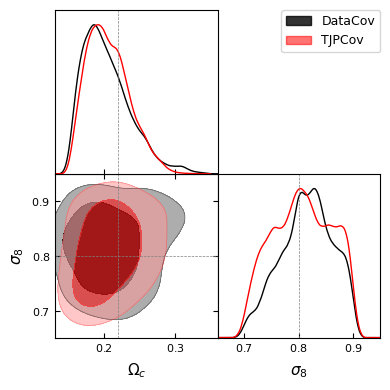


 The best fit for the three cases are: 


 Using data from mean mass only 


 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [71]:
# Triangle plot
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot(
    [sample_red, sample_red2],
    filled=True,
    legend_labels=['DataCov', 'TJPCov'],
    alphas=[0.8,0.55],
    contour_ls="-",
    contour_lws=1,
    fine_bins=1,
    colors=['black', 'red'],
    line_args=[{'lw':1.2,'ls':'-'}],
    marker_args={"linewidth": 4},
    markers={"1": 0.22, "2": 0.800},
#     param_limits={'1': [0.15, 0.3],
#                 '2' : [.7, 0.9]},
)
plt.savefig('/pbs/home/e/ebarroso/LSST_France/mock_data_run/counts_tjpcov/cosmo_plotr.pdf')

plt.show()
#g.export('apes.png')
print("\n The best fit for the three cases are: \n")
print("\n Using data from mean mass only \n")
g.export('mock_test.png')

print("\n Using data from both \n")
display(Math(sample_red2.getInlineLatex('1',limit=1)))
display(Math(sample_red2.getInlineLatex('2',limit=1)))



In [12]:
#!/usr/bin/env python

"""Defines a function to generate a SACC file for cluster number counts and cluster deltasigma."""

# # Cluster count-only SACC file creation
#
# This notebook examplifies the creation of a SACC file for cluster count, using
# NumCosmo facilities to simulate cluster data.

import math
import itertools

import numpy as np

from numcosmo_py import Nc
from numcosmo_py import Ncm

from astropy.table import Table

from astropy.io import fits
from scipy import stats
from typing import Any
import sacc

import os

os.environ["CLMM_MODELING_BACKEND"] = (
    "nc"  # Need to use NumCosmo as CLMM's backend as well.
)
import clmm
from clmm import Cosmology


H0 = 71.0
Ob0 = 0.0448
Odm0 = 0.22
n_s = 0.963
sigma8 = 0.8

cosmo = Nc.HICosmoDECpl()
reion = Nc.HIReionCamb.new()
prim = Nc.HIPrimPowerLaw.new()

cosmo.add_submodel(reion)
cosmo.add_submodel(prim)

dist = Nc.Distance.new(2.0)
tf = Nc.TransferFuncEH.new()

psml = Nc.PowspecMLTransfer.new(tf)

# psml = Nc.PowspecMLCBE.new ()
psml.require_kmin(1.0e-6)
psml.require_kmax(1.0e3)

psf = Ncm.PowspecFilter.new(psml, Ncm.PowspecFilterType.TOPHAT)
psf.set_best_lnr0()

cosmo.props.H0 = H0
cosmo.props.Omegab = Ob0
cosmo.props.Omegac = Odm0

cosmo.omega_x2omega_k()
cosmo.param_set_by_name("Omegak", 0.0)

prim.props.n_SA = n_s

old_amplitude = math.exp(prim.props.ln10e10ASA)
prim.props.ln10e10ASA = math.log((sigma8 / cosmo.sigma8(psf)) ** 2 * old_amplitude)

# CosmoSim_proxy model
# M_0, z_0

area = 439.78986
lnRl = 0.0
lnRu = 5.0
zl = 0.2
zu = 0.65

# NumCosmo proxy model based on arxiv 1904.07524v2
cluster_z = Nc.ClusterRedshiftNodist(z_max=zu, z_min=zl)
cluster_m = Nc.ClusterMassAscaso(
    M0=3.0e14 / 0.71, z0=0.6, lnRichness_min=lnRl, lnRichness_max=lnRu
)
cluster_m.param_set_by_name("mup0", 3.19)
cluster_m.param_set_by_name("mup1", 2 / np.log(10))
cluster_m.param_set_by_name("mup2", 0.0 / np.log(10))
cluster_m.param_set_by_name("sigmap0", 0.33)
cluster_m.param_set_by_name("sigmap1", -0.08 / np.log(10))
cluster_m.param_set_by_name("sigmap2", 0 / np.log(10))

# Numcosmo Mass Function
# First we need to define the multiplicity function here we will use the tinker
mulf = Nc.MultiplicityFuncTinker.new()
mulf.set_linear_interp(True)  # This reproduces the linear interpolation done in CCL
mulf.set_mdef(Nc.MultiplicityFuncMassDef.CRITICAL)
mulf.set_Delta(200)

# Second we need to construct a filtered power spectrum
hmf = Nc.HaloMassFunction.new(dist, psf, mulf)
hmf.set_area_sd(area)

# Cluster Abundance Obj
ca = Nc.ClusterAbundance.new(hmf, None)

# Number Counts object
ncount = Nc.DataClusterNCount.new(
    ca, "NcClusterRedshiftNodist", "NcClusterMassAscaso"
)
ca.prepare(cosmo, cluster_z, cluster_m)
mset = Ncm.MSet.new_array([cosmo, cluster_z, cluster_m])

rng = Ncm.RNG.seeded_new(None, 2)
ncount.init_from_sampling(mset, area * ((np.pi / 180) ** 2), rng)

ncount.catalog_save("ncount_rich.fits", True)
ncdata_fits = fits.open("ncount_rich.fits")
ncdata_data = ncdata_fits[1].data  # pylint: disable-msg=no-member
ncdata_Table = Table(ncdata_data)

# ## Saving in SACC format

data_table = ncdata_Table[ncdata_Table["LNM_OBS"] > 2]
cluster_z = data_table["Z_OBS"]
cluster_lnm = data_table["LNM_OBS"]
cluster_richness = cluster_lnm / np.log(10.0)
cluster_logM = data_table["LNM_TRUE"] / np.log(10.0)

# ## Count halos in the $N_{\rm richness} \times N_z$ richness-redshift plane

N_richness = 5  # number of richness bins
N_z = 4  # number of redshift bins

cluster_counts, z_edges, richness_edges, _ = stats.binned_statistic_2d(
    cluster_z, cluster_richness, cluster_logM, "count", bins=[N_z, N_richness]
)
cluster_counts2, richness_edges2, z_edges2, _ = stats.binned_statistic_2d(
    cluster_richness, cluster_z, cluster_logM, "count", bins=[N_richness, N_z]
)
richness_bins = [[richness_edges[i], richness_edges[i+1]] for i in range(0, len(richness_edges)-1)]
z_bins = [[z_edges[i], z_edges[i+1]] for i in range(0, len(z_edges)-1)]

In [28]:
richness_bins = [[richness_edges[i], richness_edges[i+1]] for i in range(0, len(richness_edges)-1)]
z_bins = [[z_edges[i], z_edges[i+1]] for i in range(0, len(z_edges)-1)]
print(cluster_counts)
im = plt.imshow(
    cluster_counts,  # Transpose to align axes correctly
    origin="lower",    # Set the origin to the lower-left
    aspect="auto",     # Ensure the aspect ratio is preserved
    extent=[richness_bins[0][0], richness_bins[-1][1],  # X-axis extent
            z_bins[0][0], z_bins[-1][1]],               # Y-axis extent
    cmap="coolwarm"     # Improved colormap
)


[[249. 104.  38.   6.   2.]
 [373. 154.  52.  12.   3.]
 [569. 210.  75.  10.   5.]
 [666. 216.  75.  13.   3.]]


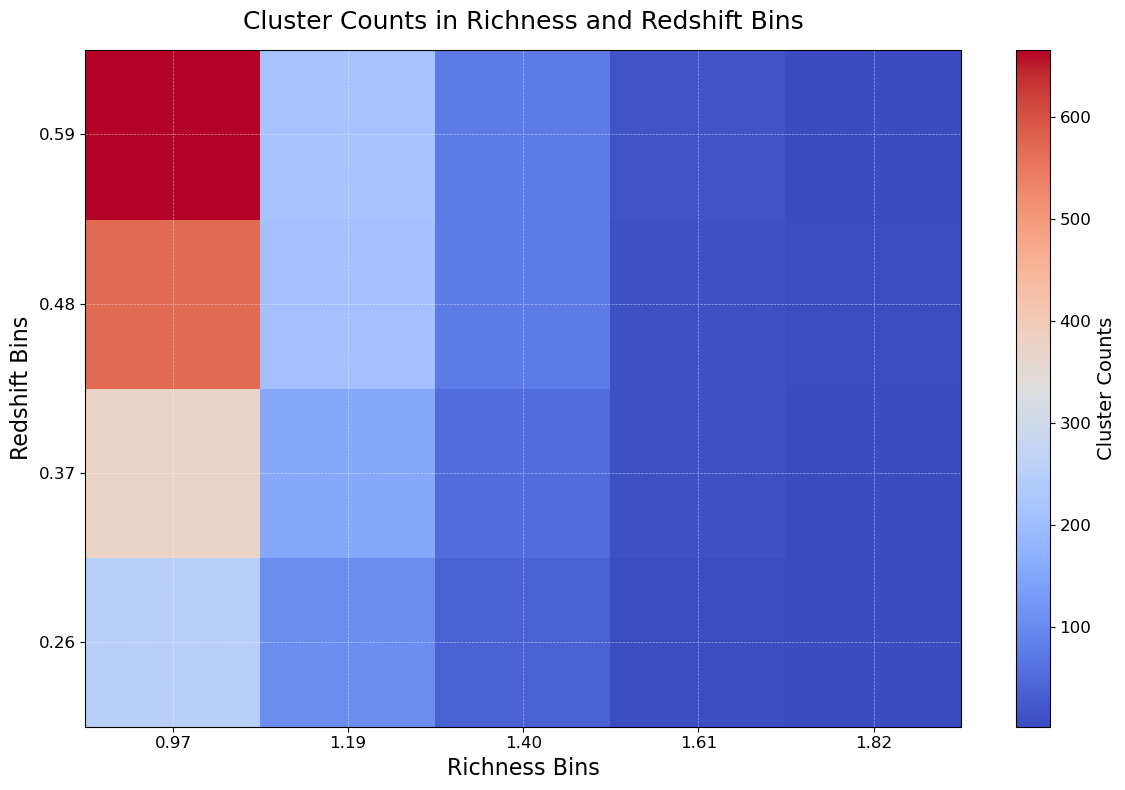

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming cluster_counts, richness_bins, and z_bins are defined
N_richness = 5  # number of richness bins
N_z = 4  # number of redshift bins

# Bin centers for richness and redshift
richness_bin_centers = [0.5 * (edge[0] + edge[1]) for edge in richness_bins]
z_bin_centers = [0.5 * (edge[0] + edge[1]) for edge in z_bins]

# Create the figure
plt.figure(figsize=(12, 8))

# Display the cluster_counts heatmap
im = plt.imshow(
    cluster_counts,  # Transpose to align axes correctly
    origin="lower",    # Set the origin to the lower-left
    aspect="auto",     # Ensure the aspect ratio is preserved
    extent=[richness_bins[0][0], richness_bins[-1][1],  # X-axis extent
            z_bins[0][0], z_bins[-1][1]],               # Y-axis extent
    cmap="coolwarm"     # Improved colormap
)

# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label("Cluster Counts", fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Set axis labels and title
plt.xlabel("Richness Bins", fontsize=16)
plt.ylabel("Redshift Bins", fontsize=16)
plt.title("Cluster Counts in Richness and Redshift Bins", fontsize=18, pad=15)

# Add ticks for the bin centers
plt.xticks(richness_bin_centers, [f"{center:.2f}" for center in richness_bin_centers], fontsize=12)
plt.yticks(z_bin_centers, [f"{center:.2f}" for center in z_bin_centers], fontsize=12)

# Add grid lines
plt.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.5)

# Adjust layout for better fit
plt.tight_layout()
plt.savefig("/pbs/home/e/ebarroso/LSST_France/mock_data_run/counts_plot.png")
# Show the plot
plt.show()


In [39]:
datav = [34946270940128.73, 26186923521823.594, 2344492414204.8213, 1689894247131.517, 25856950672204.85, 15703244207435.365, 12586764587390.443, 9064949832526.785, 5563127272695.953, 4835813518715.419, 2706960403524.437, 2659703946255.448, 52967122656055.97, 36875617549698.766, 4001596942505.3477, 3218152326051.997, 33785722053091.008, 28989978719499.305, 22767975950128.453, 16318840700061.05, 12002128536706.193, 8483280423792.041, 8138639728762.806, 5568511240391.857, 64066814352377.99, 59617303504907.56, 1015036590820.7109, 1818776292634.691, 59112860686431.14, 21084585693478.637, 26556950791014.133, 18091905087279.742, 9041587464575.926, 9228260256799.365, 11687092922487.572, 5877774736414.026, 65778796564403.06, 66802453941594.22, 2490554884557.0957, 8625856459373.651, 57481032441591.16, 32587401276986.33, 36335150865848.12, 35652011766212.65, 18674618112651.684, 11185691708836.873, 7910639194838.65, 10935864698654.805, 32764259060845.73, 25618055734170.023, 3499646357923.0317, 2368501693310.059, 24563781887526.05, 16961111097153.496, 12211999421058.807, 9080995645313.848, 8453084643549.688, 5727630787832.572, 4290776575357.517, 3889354214560.2812, 40143721814126.73, 34033255412119.67, 2264938646570.5474, 2444703009463.5825, 32259961008523.83, 26035000506699.637, 19247745102121.312, 13582779260535.674, 11601324993282.809, 5955889712198.941, 4589009663520.138, 3112124214248.3604, 47610417882918.516, 62999347109737.055, 5897439895374.482, 4349134798145.13, 53561092401251.98, 28464369610668.81, 31796140751539.438, 25923675825013.406, 13691467489761.473, 15064009788162.154, 5073144513224.176, 7098809772788.992, 88713876264706.08, 95672352184793.98, 4818403345589.32, 9611970528502.61, 71608910497569.58, 37236450053860.99, 29613938763241.99, 41214057750926.31, 27570354775437.94, 12897153700934.643, 18586222828076.082, 12644271586014.613, 41179493691583.086, 27279163666462.11, 2637175868152.6396, 2607151530685.7505, 23617322469033.84, 17602717371259.68, 11250323417693.852, 10326006333355.564, 6902985285875.195, 5201339997855.908, 2336653850216.403, 2494814188869.2427, 53466850753142.414, 44102659919760.375, 2597023025061.7163, 2210440569694.8506, 39247405239497.445, 33124979043300.88, 23339803935914.523, 15334496699432.836, 10303492871580.658, 8663026365994.94, 6920037049138.413, 4646897442761.645, 85447745974125.39, 71407914649638.62, 9082775399022.887, 5683807896492.262, 34599700974983.98, 28567267672495.64, 31355675171609.305, 12023500825375.0, 16252915139809.273, 12299113088623.713, 9271860490973.227, 5401132260193.353, 81467923153761.34, 57736018044100.195, 9339836806906.373, 4604181640014.967, 63662558486003.11, 37725087914149.875, 30591597226377.316, 20718920998610.305, 19375039981861.52, 8707289933220.177, 11095875568723.598, 10500827516422.137, 39231928669795.33, 24032354649813.242, 3926545941456.1694, 2372144503508.048, 22672630162101.977, 20589467665962.406, 15390770060285.28, 8804669083013.615, 6577209667485.187, 5945741697185.504, 2665811683745.4346, 2980579386302.584, 50054011714559.734, 43481198353964.055, 2003396991055.2168, 2235601722083.229, 28070610816892.15, 25866236047858.9, 16758787730540.908, 17798993006762.016, 11214195065976.482, 8920717741915.832, 3396746976490.9272, 2703396786828.1147, 57711647922660.01, 50188618368437.414, 6483135009247.4, -827820802067.7711, 47045396046985.88, 41438086698210.07, 25403138759940.45, 15069600232838.42, 19582491297267.684, 4087713256078.953, 7709102217569.414, 3543112851447.657, 96764356806346.45, 68969015900360.945, 8080024253985.101, 8942778906142.111, 59628304514480.445, 55955080697017.58, 40394878679519.266, 37578113917679.59, 24706944455283.9, 17938341430555.91, 8671483941572.056, 15790345848664.016, 37083792328418.76, 26126218966260.066, 2620747989642.841, 3742295823098.216, 20097564802160.895, 18784508829736.656, 14487763484319.008, 9116711505991.19, 7289452754740.595, 4515154058107.54, 4110897437932.6187, 4351459943545.098, 53368417175645.375, 36557848621207.9, 3233551078127.3057, 1754544868873.674, 27127511750413.074, 22392541234692.938, 20383984643829.777, 13051219700488.074, 10313874371954.855, 9183605257136.0, 9149670660558.443, 5760801786784.24, 78801749808209.6, 42678723203794.86, 7720791158146.615, 4280629622832.5396, 44785240583902.57, 55891955697681.07, 36153086546042.87, 33010061535198.234, 16803048391764.943, 8275538341303.912, 7497673058422.125, 4041847573857.198, 79721770085777.78, 56831378447089.34, -1159559125518.7754, 5190733321930.797, 43349245179434.68, 31656608341838.31, 30477866220869.477, 18355126903487.72, 8849251450662.307, 19392827800538.82, 16446738622237.027, 9366749121835.596, 45606684236012.55, 37117707091956.98, 4064963118256.136, 3144627088854.49, 25987859319397.82, 13722874056195.83, 11894134225322.805, 8091054665339.939, 9910661973767.623, 7581906711608.452, 4324611201262.721, 4846745814571.476, 56977662018278.85, 38457402015258.54, 3624020949563.451, 3283901108714.939, 39523044844285.64, 21388410689045.195, 19606646527455.97, 17124724016852.074, 9890556221567.691, 7488107766665.385, 6540366338932.838, 4852057671466.983, 108700198225712.7, 62604412467007.11, 6747520329195.831, 6303446365052.873, 51922926688194.15, 37896579443363.37, 28698307313340.305, 31616670290276.12, 9560070005816.92, 13081152982097.332, 2519024253510.1836, 4424519775358.976, 76743486368052.86, 66354418051301.41, 8697941711351.932, 11434267375032.006, 92394019115615.89, 29069642437418.098, 27323660626535.105, 26745553660293.945, 25824943462434.945, 3215075380725.8843, 4290722027416.201, 12286369782505.14, 39858199430787.5, 34834047739988.96, 3661343976676.596, 3338091191412.056, 30077540136950.375, 19578912103402.305, 17754199183999.707, 9773091992335.455, 10607687837883.62, 6887323371718.717, 6987395778696.287, 2874776982040.532, 51696333057803.984, 45243815470231.64, 5088709226670.689, 5173006562867.474, 33865502669303.145, 27080903037527.85, 13138862884828.002, 12872309905050.31, 12279028319437.738, 6258847539398.648, 4488664727460.944, 5598873239818.152, 67611540849920.586, 66052951964922.19, 8798438106463.217, 9914227816358.717, 3704920686756.2466, 47384140348161.45, 38819120378942.875, 19766976645172.52, 7450985027389.8125, 19473249291903.6, 10286226469615.025, 5176487090405.092, 27076256829643.14, 111648564807785.97, 5198643655987.869, 1072642155126.6516, 70521099986804.33, 82864593983074.61, 27016106658791.89, 21850558084472.105, 12216322584107.986, 17288207882780.006, 19645226465472.605, 5540134735103.139]
theov = [33361946721924.945, 26194756294509.91, 1921876789604.6846, 1389297967358.8767, 20315498199141.375, 15579760580241.523, 11826719165151.564, 8902855567569.504, 6641066136945.372, 4917954624524.807, 3616526962224.674, 2643418552073.123, 45930121503257.586, 36503552992109.555, 2875752552877.113, 2088489090631.5798, 28630082416563.973, 22183332485988.074, 16998369261100.676, 12905162596512.625, 9701138929589.035, 7234258517665.983, 5353435478160.373, 3935231213080.294, 60330598872453.625, 48499102921862.25, 4090161180736.7656, 2983717058733.1094, 38444580976763.49, 30081195236169.56, 23258055961391.668, 17802061883820.332, 13481904287118.758, 10121270788987.74, 7535392527161.853, 5569525436256.904, 73576343933589.84, 59687605250422.17, 5320689396565.381, 3895598427050.9727, 47718757064982.55, 37634551108950.63, 29310934123935.875, 22584607492833.33, 17207873812169.486, 12989633701500.611, 9719118417056.53, 7215862239362.726, 33691128885283.93, 26454070796553.86, 1941231175681.4502, 1403304022060.8748, 20517196833210.605, 15734839822486.184, 11944709709604.736, 8991855407553.81, 6707575310448.437, 4967286638093.447, 3652856972741.6104, 2670007856675.6177, 46211658307696.586, 36722260776755.9, 2890545024394.376, 2099115089258.3232, 28797896412602.34, 22310678482370.75, 17094057003325.086, 12976496696894.68, 9753862031642.088, 7272966273311.577, 5381672152306.855, 3955717207533.352, 60564006006852.11, 48673505654506.93, 4097971065470.9854, 2989080329328.6406, 38572943690439.75, 30174424640252.78, 23324990462847.5, 17849691552245.43, 13515480373698.273, 10144778319122.287, 7551748437702.601, 5580849630530.386, 73632927184482.19, 59706226488532.52, 5307129453522.711, 3884926546146.4927, 47713004591998.56, 37614787674611.77, 29284555743889.547, 22556524238151.156, 17181061364902.857, 12965680854984.02, 9698677710763.25, 7198996517574.069, 34067115925222.46, 26746474763523.773, 1961453902326.0254, 1417864620320.9353, 20741943952475.617, 15905760954851.549, 12073459318354.402, 9088092508410.31, 6778900112931.314, 5019795366008.987, 3691264514500.858, 2697945251016.401, 46553058391065.945, 36982807232062.02, 2905969921360.667, 2110074611658.1448, 28994355041338.773, 22457249965947.0, 17202399169191.363, 13056008897822.629, 9811757182473.184, 7314874135594.775, 5411838163659.352, 3977330667536.8936, 60877893581832.64, 48904444416403.24, 4106434695092.878, 2994724881774.077, 38740093266204.83, 30293648397650.703, 23408938179458.152, 17908198479804.594, 13555816516309.748, 10172358663626.31, 7570462826401.913, 5593468209160.795, 73786075446310.16, 59792709081324.28, 5293999035108.805, 3874301468338.266, 47753676213139.23, 37625923584429.08, 29278158333839.5, 22540975224443.664, 17161815207120.896, 12946086625226.037, 9680584532326.055, 7183262847231.473, 34480244696757.984, 27064608800432.37, 1982106448795.7632, 1432667661314.0476, 20984196923020.773, 16088390536787.072, 12209912039286.344, 9189322568735.908, 6853404671444.102, 5074295098127.263, 3730894804988.9443, 2726617305105.3877, 46942207555643.2, 37276052855618.07, 2921555088243.1426, 2121037239570.2961, 29212654874156.4, 22618041520868.26, 17319750359566.89, 13141064754300.38, 9872936305367.264, 7358637095426.862, 5442980716893.879, 3999399651805.222, 61257337809025.97, 49180741302326.445, 4115073547071.991, 3000325656250.4233, 38937796136068.33, 30432891416571.516, 23505619527566.86, 17974549186421.58, 13600785624737.145, 10202532427274.244, 7590514416180.405, 5606680383503.056, 74019483376130.08, 59935103832705.38, 5281026918808.913, 3863566669559.6216, 47832217411444.45, 37661969870074.95, 29287637901066.574, 22535202608346.777, 17148321619407.18, 12929682315534.088, 9664102323422.695, 7168208024612.297, 34921380135746.93, 27401611116130.2, 2002826363334.1611, 1447458093643.6091, 21238860231593.703, 16278982198307.113, 12351337055988.5, 9293567841547.969, 6929667007579.022, 5129768776794.739, 3771024016219.479, 2755510955411.0405, 47367704043786.53, 37593516349183.086, 2936927109422.326, 2131746635419.4524, 29446577556061.875, 22788551327182.402, 17442886999801.799, 13229375250596.758, 9935788454996.672, 7403128720620.775, 5474316821775.058, 4021382433085.4907, 61687769707065.445, 49491596105539.39, 4123491263579.9023, 3005620053182.628, 39158188194619.86, 30586519372768.5, 23611055642887.098, 18045966634899.426, 13648473131208.69, 10233992309591.426, 7611018566799.986, 5619892067874.289, 74316389374003.42, 60121144826598.164, 5267939384210.119, 3852564856152.2437, 47939859708471.37, 37716796793852.34, 29308800262685.38, 22536392270235.055, 17138732889288.17, 12915279449524.785, 9648483587947.531, 7153373242856.283, 35383058082440.45, 27751950008343.97, 2023357072899.8677, 1462057743526.0603, 21501883479385.52, 16474600864814.201, 12495626314331.76, 9399324111792.822, 7006621565736.78, 5185465394981.886, 3811125334012.179, 2784258013943.175, 47819556159395.86, 37927850829333.1, 2951809003361.2114, 2142016847136.0244, 29690804877509.797, 22964982657855.64, 17569131262798.709, 13319069515187.156, 9999019648466.883, 7447460729939.322, 5505240926002.912, 4042868518708.036, 62156287193988.734, 49827544413337.87, 4131399425551.0317, 3010423862028.5786, 39394460250168.38, 30749719841614.797, 23721900150349.754, 18120155498707.68, 13697327405368.977, 10265702073524.459, 7631291422486.866, 5632656849516.012, 74661781621926.42, 60339938952844.35, 5254547675912.385, 3841198602913.7715, 48068892910430.39, 37785077457246.9, 29338051592287.082, 22542173774930.67, 17131525332241.041, 12901924010339.422, 9633149066218.6, 7138419590042.489, 36088271363806.19, 28283104996884.832, 2052790515025.6455, 1482891089535.5718, 21897743922630.363, 16766923988518.406, 12709768573770.502, 9555252115983.785, 7119375045132.77, 5266588762513.666, 3869207059416.503, 2825675305918.0757, 48512059450398.63, 38435500040588.3, 2972221865389.145, 2155928629278.228, 30058018152006.293, 23227548978388.914, 17755008741782.57, 13449679237187.234, 10090047150172.25, 7510536179248.363, 5548714496762.4795, 4072707159927.063, 62883522170251.39, 50344665545891.1, 4141496664508.0474, 3016219137377.981, 39754723044139.89, 30995881112865.19, 23887005057653.695, 18229051495248.207, 13767793604891.537, 10310484495207.07, 7659187988034.454, 5649657567940.33, 75221812374930.28, 60696198802129.06, 5234469112196.933, 3824063380497.9707, 48280719665671.36, 37899064830623.98, 29389022369965.535, 22555045618603.945, 17123081236990.885, 12883136914177.277, 9610729929987.922, 7116196816853.877]
print(np.array(theov)/np.array(datav) - 1 )

[-4.53360023e-02  2.99110076e-04 -1.80258900e-01 -1.77878752e-01
 -2.14311910e-01 -7.86357428e-03 -6.03844949e-02 -1.78814299e-02
  1.93764912e-01  1.69859953e-02  3.36010293e-01 -6.12301012e-03
 -1.32856021e-01 -1.00897173e-02 -2.81348773e-01 -3.51028516e-01
 -1.52598178e-01 -2.34793075e-01 -2.53408854e-01 -2.09186312e-01
 -1.91715128e-01 -1.47233363e-01 -3.42219873e-01 -2.93306408e-01
 -5.83174849e-02 -1.86492846e-01  3.02957018e+00  6.40508000e-01
 -3.49641000e-01  4.26691312e-01 -1.24219639e-01 -1.60206016e-02
  4.91099250e-01  9.67691100e-02 -3.55238075e-01 -5.24431973e-02
  1.18541958e-01 -1.06505798e-01  1.13634698e+00 -5.48381260e-01
 -1.69834726e-01  1.54880403e-01 -1.93317396e-01 -3.66526421e-01
 -7.85421309e-02  1.61272279e-01  2.28613539e-01 -3.40165370e-01
  2.82890519e-02  3.26338217e-02 -4.45306475e-01 -4.07514030e-01
 -1.64737868e-01 -7.22989943e-02 -2.18874651e-02 -9.81613044e-03
 -2.06493772e-01 -1.32750203e-01 -1.48672295e-01 -3.13508693e-01
  1.51155304e-01  7.90111